In [1]:
# seaborn - statistical library created by Michael Waskom

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### LINE PLOTS

In [3]:
s = pd.Series(np.random.randn(10).cumsum(), 
              index=np.arange(0, 100, 10))
s

# avoid index by passing use_index=False
# use ticks and limits to adjust the axis elements

0     0.243467
10   -0.484871
20   -1.909556
30   -2.529983
40   -4.599413
50   -5.202219
60   -3.716040
70   -2.154667
80   -3.425342
90   -3.548233
dtype: float64

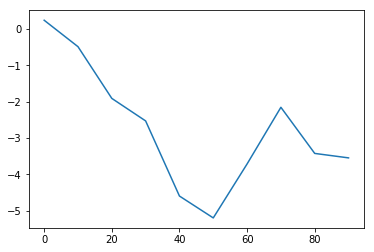

In [4]:
s.plot();

In [5]:
# DF's plot method plots columns as different line on the same subplot
# legend is created automatically
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.102967,-0.097436,-0.309417,-0.234825
10,0.081175,-0.323053,-0.495373,-0.211698
20,1.606503,-1.909111,-0.451923,-0.990192
30,3.100366,-4.235865,-2.156926,-0.209193
40,4.103507,-2.748487,-3.166716,0.493037
50,5.187988,-4.251722,-2.852793,1.778436
60,5.748320,-4.792953,-1.788033,2.798069
70,6.093217,-4.757452,-1.153007,2.985791
80,6.605015,-4.893535,-0.221157,1.965191
90,8.420056,-4.463809,-1.217300,1.096103


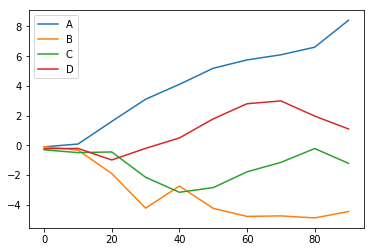

In [6]:
df.plot()

In [7]:
# here df.plot() == df.plot.line()

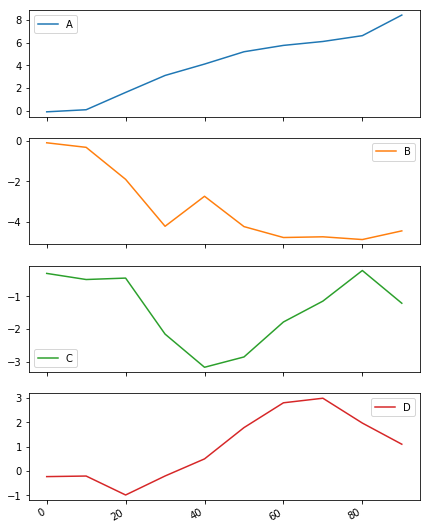

In [8]:
# plot specific arguments
df.plot(subplots=4, figsize=(7, 10));

### BAR PLOTS

In [9]:
# plot.bar() - vertical bar plot
# plot.barh() - horizontal bar plot
# indexes of Series or DF will be used as x(bar) or y(barh) ticks

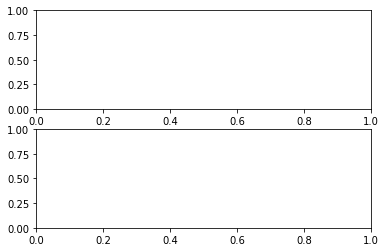

In [10]:
fig, axes = plt.subplots(2, 1)

In [11]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data

a    0.668524
b    0.288946
c    0.358816
d    0.449245
e    0.236594
f    0.420106
g    0.574428
h    0.135926
i    0.702501
j    0.834132
k    0.394069
l    0.738414
m    0.445135
n    0.090984
o    0.049143
p    0.994526
dtype: float64

In [12]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [13]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

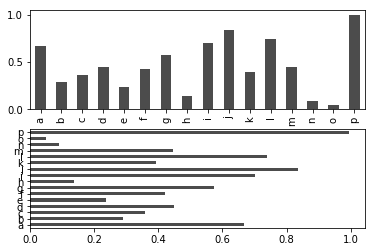

In [14]:
fig, axes = plt.subplots(2, 1)
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [15]:
# plotting bar for a DF
df = pd.DataFrame(np.random.rand(6, 4).cumsum(0),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'C'],
                                  name='Genus'))
df

Genus,A,B,C,C
one,0.057443,0.559891,0.419892,0.570285
two,1.002467,1.412527,0.822827,0.735128
three,1.571078,1.990094,0.864731,1.053726
four,1.575695,2.788411,1.535619,1.246635
five,2.087504,3.226291,2.165238,1.515879
six,2.256370,3.516069,2.543533,1.801850


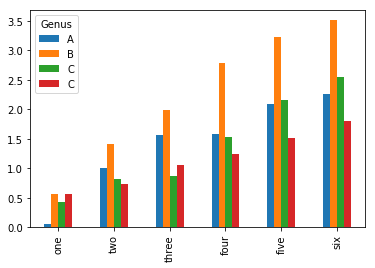

In [16]:
df.plot.bar()

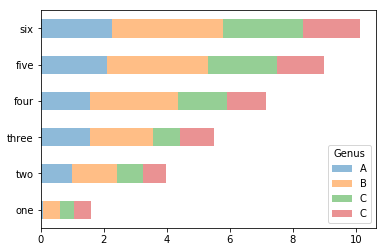

In [17]:
# name of the DF is used as title for legend
# create stacked bar plots by passing stacked=True
# this will stack the values together in each row
df.plot.barh(stacked=True, alpha=0.5)

In [18]:
# performing above with tipping dataset

In [19]:
tips = pd.read_csv('../resources/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [20]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
# not many 1-person and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [22]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


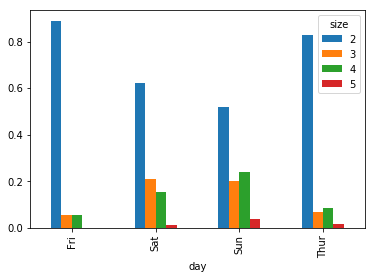

In [23]:
party_pcts.plot.bar()

In [24]:
# seaborn simplifies the requirements of aggregation and summarization
# tipping percentage by day with seaborn

In [25]:
import seaborn as sns

In [26]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [27]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


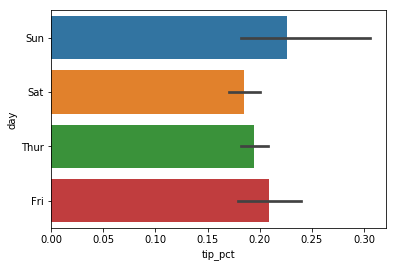

In [28]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [29]:
# color bars - average value of tip_pct
# black lines - represent the 95% confidence interval (configurable) 

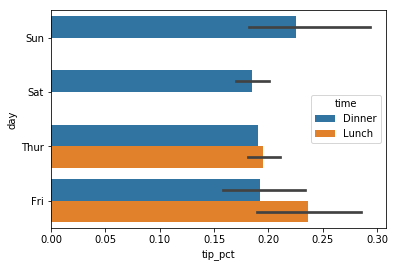

In [30]:
# seaborn.barplot - hue option - enables to split by an additional categorical value
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

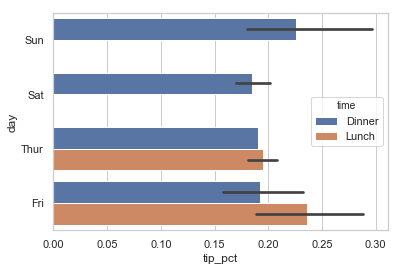

In [31]:
# seaborn has fixed defaults for plot aesthetics
# switch b/w different plot appearances
sns.set(style='whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### HISTOGRAM AND DENSITY PLOTS

In [32]:
# provides a discretized display of value frequency
# data is split into discrete, evenly spaced bins
# the number of data points in each bin are plotted

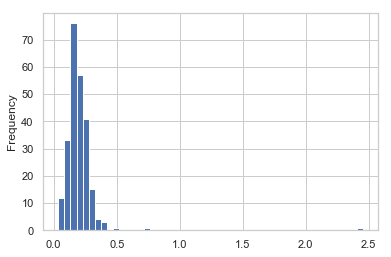

In [33]:
# using tipping data, create histogram of tip percentages of the total bill
tips['tip_pct'].plot.hist(bins=50)

In [34]:
# density plots - formed by computing estimate of a continuous probability distribution
# also know as KDE - kernel density estimate

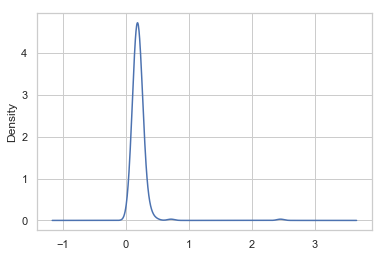

In [35]:
tips['tip_pct'].plot.density()

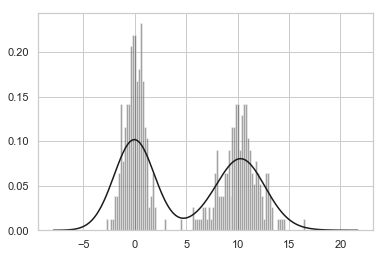

In [36]:
# distplot - plots a histogram and continuous density estimate simultaneously
# Ex. - bimodal distribution consisting of draws from two different standard normal distributions
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### SCATTER OR POINT PLOTS

In [37]:
# useful in examining the relationship b/w two one-dimensional data series

In [38]:
macro = pd.read_csv('../resources/examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

In [39]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 v/s log unemp')

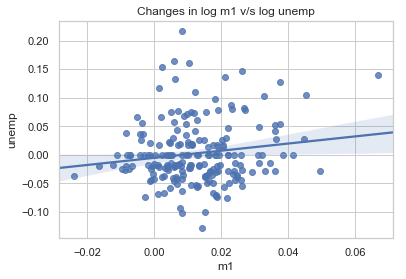

In [41]:
# use 'regplot' to plot a scatter and fit a linear regression line
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s v/s log %s' % ('m1', 'unemp'))

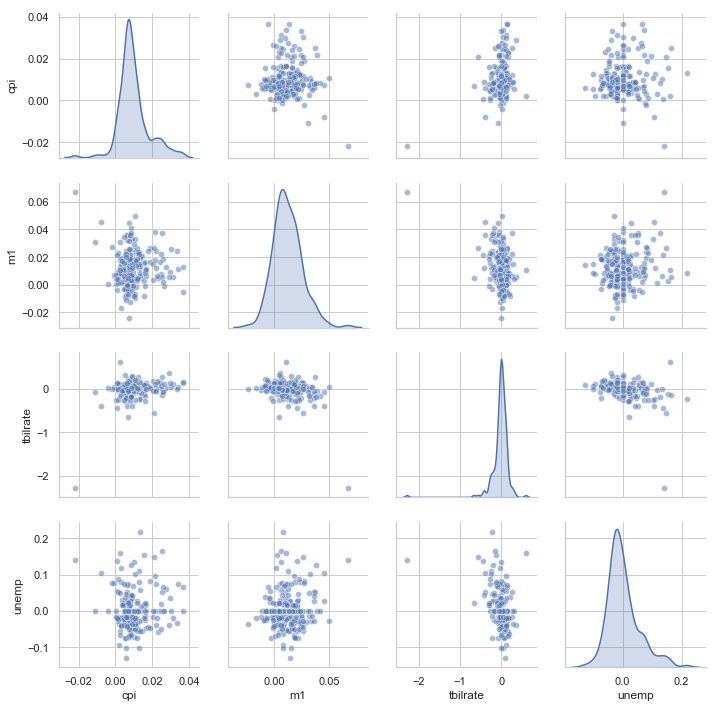

In [46]:
# pairplot - supports placing histograms or density estimates of each variable along the diagonal
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.5})

### FACET GRIDS AND CATEGORICAL DATA

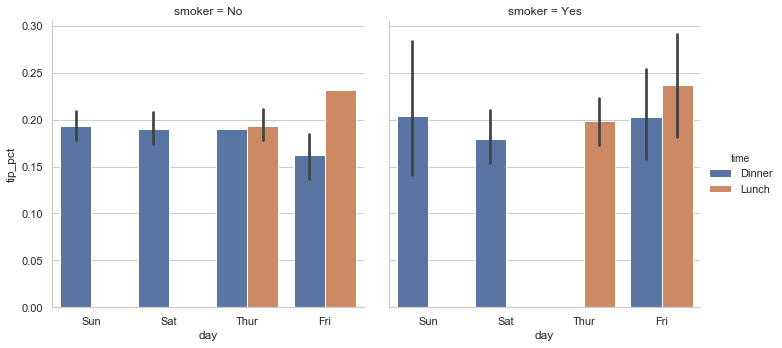

In [48]:
# additional grouping dimensions? - use 'facet grid'
# factorplot - plot faceted plots - deprecated
# use catplot as the new function
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

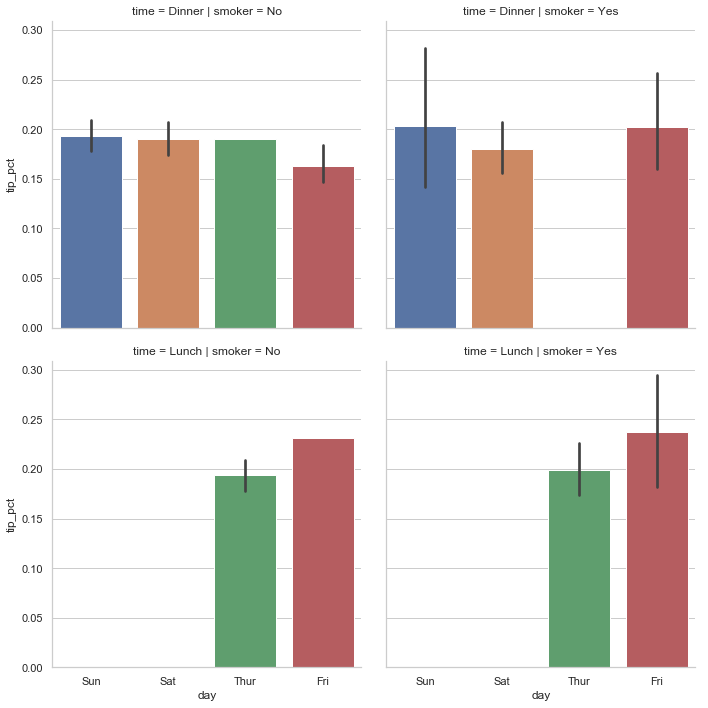

In [49]:
# expand the facet grid by adding one row per time value
sns.catplot(x='day', y='tip_pct', row='time', col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

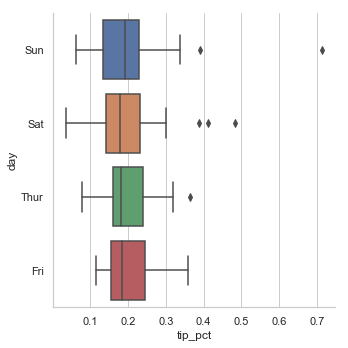

In [50]:
# plotting box-plots using catplot
sns.catplot(x='tip_pct', y='day', kind='box', 
            data=tips[tips.tip_pct < 1])

### NOTE:
##### Bokeh and Plotly - dynamic, interactive graphics destined for web browser 